In [4]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [5]:
df = pd.read_csv(r"C:\Users\sangh\OneDrive\Documents\FYP_data\1minData.csv")

In [6]:
df.head()

,cycle_no,hold_time_s,Max_ Strain_%,Max_ Stress_MPa
0,1,27.075,0.401,226.440
1,1,27.288,0.400,219.510
2,1,27.501,0.400,208.143
3,1,27.715,0.401,207.911
4,1,28.034,0.399,197.100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585 entries, 0 to 1584
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cycle_no         1585 non-null   int64  
 1   hold_time_s      1585 non-null   float64
 2   Max_ Strain_%    1585 non-null   float64
 3   Max_ Stress_MPa  1585 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 49.7 KB


In [8]:
print(df.columns.tolist())

['cycle_no', 'hold_time_s', 'Max_ Strain_%', 'Max_ Stress_MPa']


In [9]:
 if 'hold_time_s' in df.columns:
        df['hold_time_s'] = df['hold_time_s'].astype(float)
        df['hold_time_s'] = df['hold_time_s'] - 27  # adjust

In [10]:
df.head()

,cycle_no,hold_time_s,Max_ Strain_%,Max_ Stress_MPa
0,1,0.075,0.401,226.440
1,1,0.288,0.400,219.510
2,1,0.501,0.400,208.143
3,1,0.715,0.401,207.911
4,1,1.034,0.399,197.100


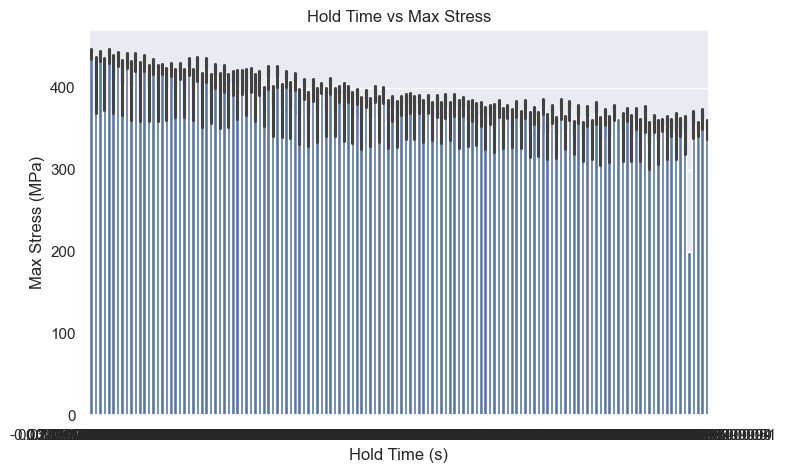

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='hold_time_s', y='Max_ Stress_MPa', data=df)
plt.xlabel('Hold Time (s)')
plt.ylabel('Max Stress (MPa)')
plt.title('Hold Time vs Max Stress')
plt.show()

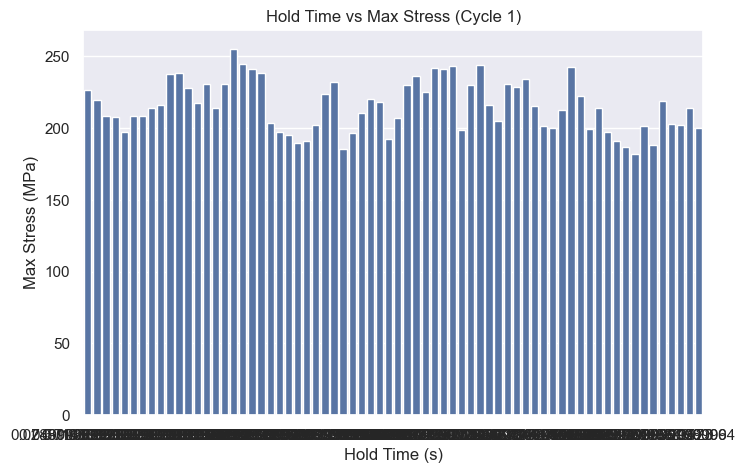

In [12]:
plt.figure(figsize=(8,5))

# Filter for cycle_no = 1
df_cycle1 = df[df['cycle_no'] == 1]

sns.barplot(x='hold_time_s', y='Max_ Stress_MPa', data=df_cycle1)
plt.xlabel('Hold Time (s)')
plt.ylabel('Max Stress (MPa)')
plt.title('Hold Time vs Max Stress (Cycle 1)')
plt.show()


C:\Users\sangh\AppData\Local\Temp\ipykernel_11996\1281852730.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Max_ Stress_MPa'])


<Axes: xlabel='Max_ Stress_MPa', ylabel='Density'>

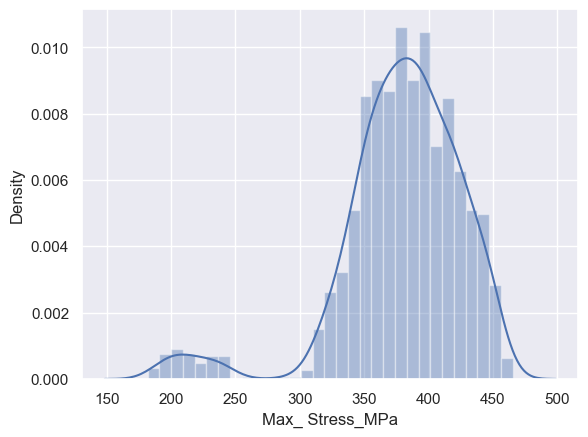

In [13]:
sns.distplot(df['Max_ Stress_MPa'])

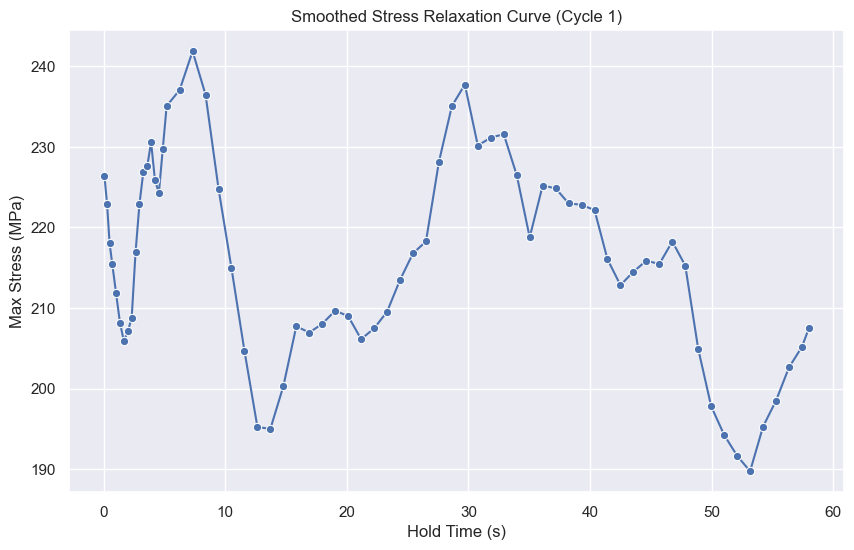

In [14]:
# Filter for cycle 1 and make a copy
df_cycle1 = df[df['cycle_no'] == 1].copy()

# Smooth the Max_Stress_MPa column
df_cycle1['Max_Stress_Smooth'] = df_cycle1['Max_ Stress_MPa'].rolling(window=5, min_periods=1).mean()

# Plot the smoothed line
plt.figure(figsize=(10,6))
sns.lineplot(x='hold_time_s', y='Max_Stress_Smooth', data=df_cycle1, marker='o')
plt.xlabel('Hold Time (s)')
plt.ylabel('Max Stress (MPa)')
plt.title('Smoothed Stress Relaxation Curve (Cycle 1)')
plt.grid(True)
plt.show()


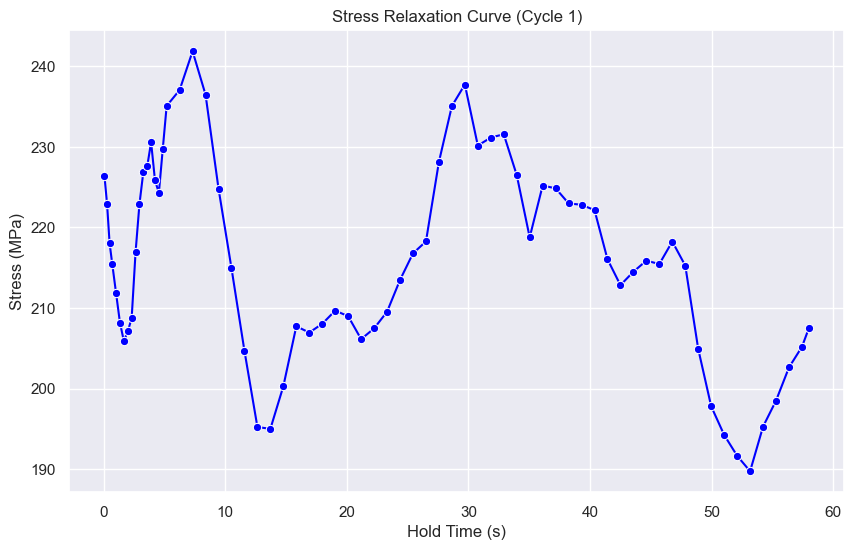

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter cycle 1
df_cycle1 = df[df['cycle_no'] == 1].copy()

# Optional: smooth the stress to make curve clearer
df_cycle1['Max_Stress_Smooth'] = df_cycle1['Max_ Stress_MPa'].rolling(window=5, min_periods=1).mean()

# Plot the stress relaxation curve
plt.figure(figsize=(10,6))
sns.lineplot(x='hold_time_s', y='Max_Stress_Smooth', data=df_cycle1, marker='o', color='blue')

plt.xlabel('Hold Time (s)')
plt.ylabel('Stress (MPa)')
plt.title('Stress Relaxation Curve (Cycle 1)')
plt.grid(True)
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

X = df[['cycle_no', 'hold_time_s', 'Max_ Strain_%']]
y = df['Max_ Stress_MPa']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
# Predict
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.4f}')

MSE: 261.6433586010635
R²: 0.8922


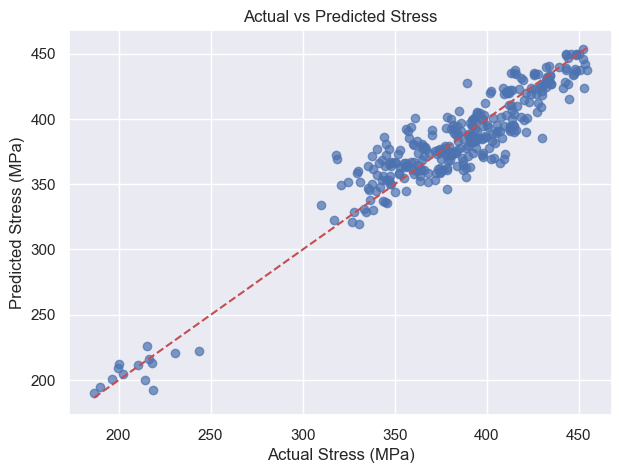

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Stress (MPa)")
plt.ylabel("Predicted Stress (MPa)")
plt.title("Actual vs Predicted Stress")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.show()


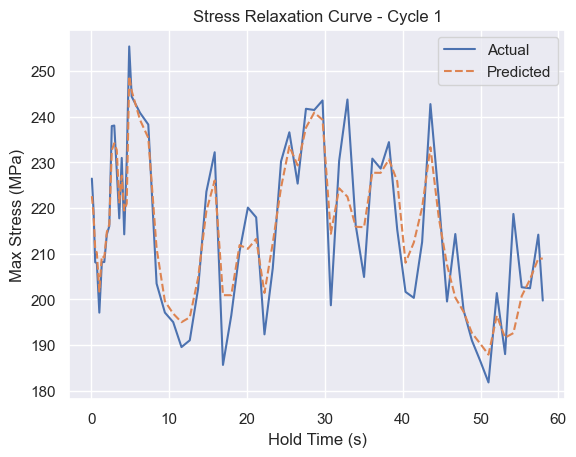

In [20]:
import matplotlib.pyplot as plt
import numpy as np

cycle = 1
cycle_data = df[df['cycle_no'] == cycle]
X_cycle = cycle_data[['cycle_no', 'hold_time_s', 'Max_ Strain_%']]
y_cycle_actual = cycle_data['Max_ Stress_MPa']
y_cycle_pred = rf.predict(X_cycle)

plt.plot(cycle_data['hold_time_s'], y_cycle_actual, label='Actual')
plt.plot(cycle_data['hold_time_s'], y_cycle_pred, label='Predicted', linestyle='--')
plt.xlabel('Hold Time (s)')
plt.ylabel('Max Stress (MPa)')
plt.title(f'Stress Relaxation Curve - Cycle {cycle}')
plt.legend()
plt.show()


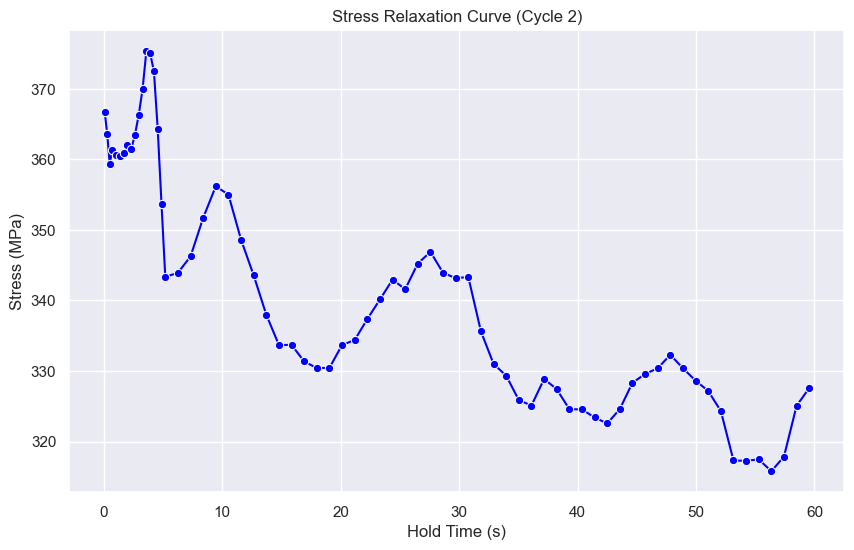

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter cycle 1
df_cycle1 = df[df['cycle_no'] == 20].copy()

# Optional: smooth the stress to make curve clearer
df_cycle1['Max_Stress_Smooth'] = df_cycle1['Max_ Stress_MPa'].rolling(window=5, min_periods=1).mean()

# Plot the stress relaxation curve
plt.figure(figsize=(10,6))
sns.lineplot(x='hold_time_s', y='Max_Stress_Smooth', data=df_cycle1, marker='o', color='blue')

plt.xlabel('Hold Time (s)')
plt.ylabel('Stress (MPa)')
plt.title('Stress Relaxation Curve (Cycle 2)')
plt.grid(True)
plt.show()


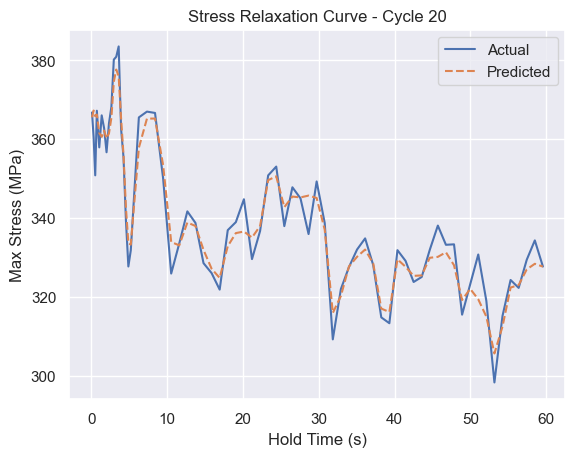

In [22]:
import matplotlib.pyplot as plt
import numpy as np

cycle = 20
cycle_data = df[df['cycle_no'] == cycle]
X_cycle = cycle_data[['cycle_no', 'hold_time_s', 'Max_ Strain_%']]
y_cycle_actual = cycle_data['Max_ Stress_MPa']
y_cycle_pred = rf.predict(X_cycle)

plt.plot(cycle_data['hold_time_s'], y_cycle_actual, label='Actual')
plt.plot(cycle_data['hold_time_s'], y_cycle_pred, label='Predicted', linestyle='--')
plt.xlabel('Hold Time (s)')
plt.ylabel('Max Stress (MPa)')
plt.title(f'Stress Relaxation Curve - Cycle {cycle}')
plt.legend()
plt.show()

In [28]:
# import pandas as pd

# # Predict for all test data
# y_pred = rf.predict(X_test)

# # Combine X_test, actual y_test, and predicted
# results = X_test.copy()
# results['Actual_Stress_MPa'] = y_test
# results['Predicted_Stress_MPa'] = y_pred

# # Save to Excel
# results.to_excel('result/rf_test_results.xlsx', index=False)
# print("✅ Test results saved as rf_test_results.xlsx")

OSError: Cannot save file into a non-existent directory: 'result'

In [28]:
# import pandas as pd

# # Predict for all test data
# y_pred = rf.predict(X_test)

# # Combine X_test, actual y_test, and predicted
# results = X_test.copy()
# results['Actual_Stress_MPa'] = y_test
# results['Predicted_Stress_MPa'] = y_pred

# # Save to Excel
# results.to_excel('result/rf_test_results.xlsx', index=False)
# print("✅ Test results saved as rf_test_results.xlsx")

OSError: Cannot save file into a non-existent directory: 'result'

In [24]:
# cycles_to_save = [1, 20]  # Add any cycles you plotted
# all_cycle_results = []

# for cycle in cycles_to_save:
#     cycle_data = df[df['cycle_no'] == cycle].copy()
#     X_cycle = cycle_data[['cycle_no', 'hold_time_s', 'Max_ Strain_%']]
#     y_cycle_actual = cycle_data['Max_ Stress_MPa']
#     y_cycle_pred = rf.predict(X_cycle)
    
#     cycle_data['Predicted_Stress_MPa'] = y_cycle_pred
#     all_cycle_results.append(cycle_data)

# # Combine all selected cycles
# df_cycles_results = pd.concat(all_cycle_results)
# df_cycles_results.to_csv('results/rf_cycle_results.csv', index=False)
# print("✅ Cycle-specific results saved as rf_cycle_results.csv")

In [ ]:
# # Example: smooth stress for cycle 1
# df_cycle1 = df[df['cycle_no'] == 1].copy()
# df_cycle1['Max_Stress_Smooth'] = df_cycle1['Max_ Stress_MPa'].rolling(window=5, min_periods=1).mean()

# df_cycle1.to_csv('results/rf_cycle1_smooth.csv', index=False)
# print("✅ Smoothed cycle 1 results saved as rf_cycle20_smooth.csv")


In [ ]:
# # Example: smooth stress for cycle 20
# df_cycle20 = df[df['cycle_no'] == 20].copy()
# df_cycle20['Max_Stress_Smooth'] = df_cycle20['Max_ Stress_MPa'].rolling(window=5, min_periods=1).mean()

# df_cycle20.to_csv('results/rf_cycle20_smooth.csv', index=False)
# print("✅ Smoothed cycle 20 results saved as rf_cycle20_smooth.csv")


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 1.0]
}


grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

In [30]:
grid.fit(X_train, y_train)
print("✅ Best Parameters:", grid.best_params_)
print("🏆 Best R² Score:", grid.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
✅ Best Parameters: {'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
🏆 Best R² Score: 0.8795964299293049


In [31]:
best_rf = grid.best_estimator_

# Evaluate tuned model
y_pred_best = best_rf.predict(X_test)
print("MSE (tuned):", mean_squared_error(y_test, y_pred_best))
print("R² (tuned):", r2_score(y_test, y_pred_best))


MSE (tuned): 260.33105321843146
R² (tuned): 0.8926910994484551


In [32]:
# ✅ Save tuned model too
joblib.dump(best_rf, 'rf_tuned_model.pkl')
print("✅ Tuned model saved as rf_tuned_model.pkl")

✅ Tuned model saved as rf_tuned_model.pkl


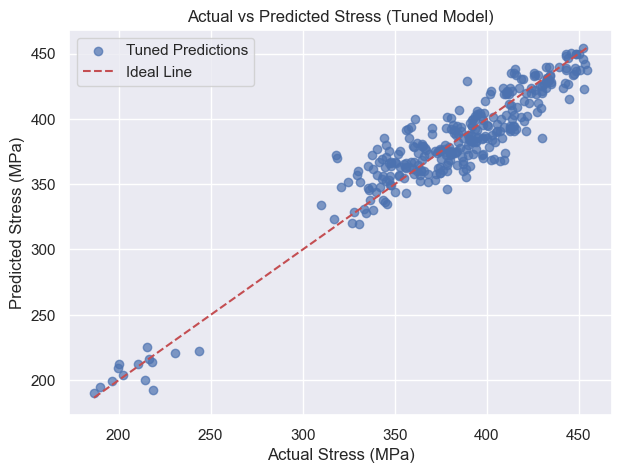

In [33]:
# Plot Tuned Model Only
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_best, alpha=0.7, label='Tuned Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.xlabel("Actual Stress (MPa)")
plt.ylabel("Predicted Stress (MPa)")
plt.title("Actual vs Predicted Stress (Tuned Model)")
plt.legend()
plt.show()

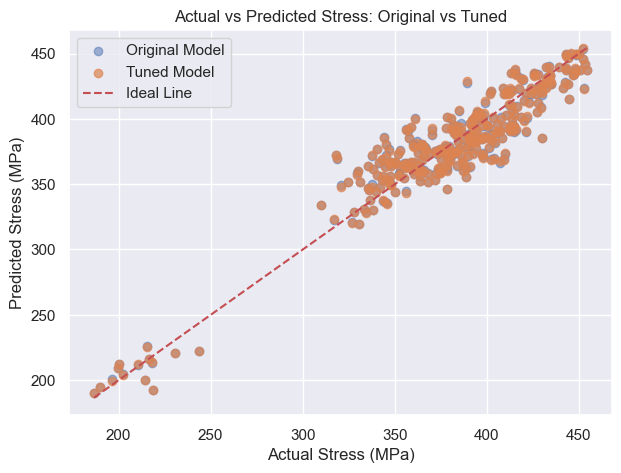

In [34]:
# Compare Original vs Tuned in One Plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5, label='Original Model')
plt.scatter(y_test, y_pred_best, alpha=0.7, label='Tuned Model')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.xlabel("Actual Stress (MPa)")
plt.ylabel("Predicted Stress (MPa)")
plt.title("Actual vs Predicted Stress: Original vs Tuned")
plt.legend()
plt.show()

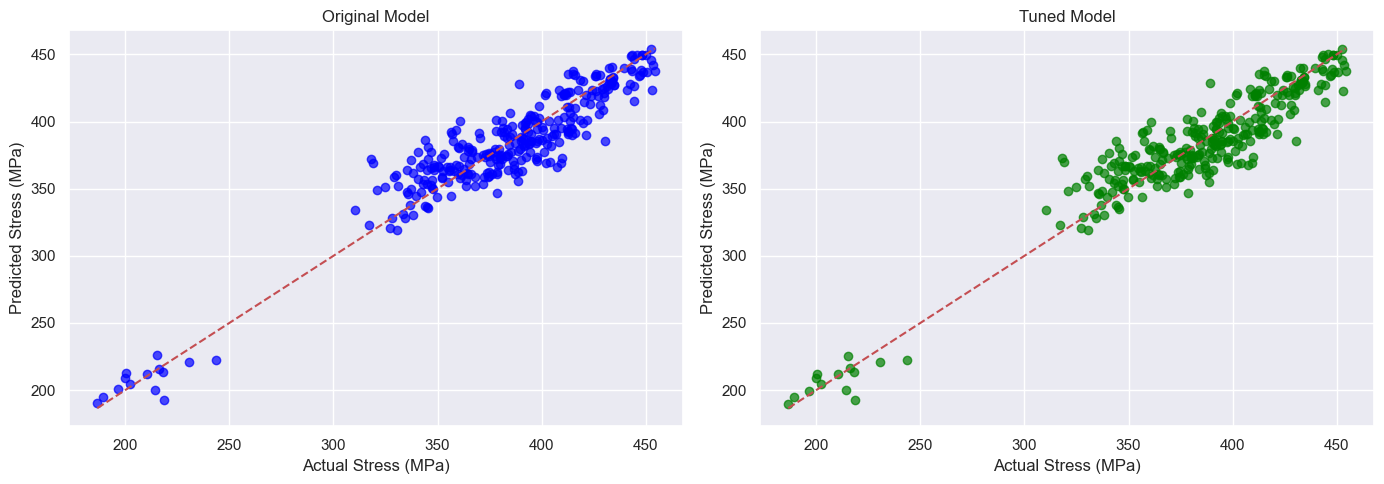

In [35]:
# side-by-side comparison,
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))  # Wide figure for side-by-side plots

# --- Left: Original Model ---
plt.subplot(1, 2, 1)  # 1 row, 2 cols, first plot
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Stress (MPa)")
plt.ylabel("Predicted Stress (MPa)")
plt.title("Original Model")
plt.grid(True)

# --- Right: Tuned Model ---
plt.subplot(1, 2, 2)  # 1 row, 2 cols, second plot
plt.scatter(y_test, y_pred_best, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Stress (MPa)")
plt.ylabel("Predicted Stress (MPa)")
plt.title("Tuned Model")
plt.grid(True)

plt.tight_layout()  # Adjust spacing
plt.show()


In [54]:
# testing with new test case of different cycles

# Load new test data
import pandas as pd

new_test = pd.read_csv(r'C:\Users\sangh\Work\dataset\1minData_nf_350.csv')  # replace with your file path

X_new = new_test[['cycle_no','hold_time_s', 'Max_ Strain_%']]
y_new = new_test['Max_ Stress_MPa']  # if actual stress is available for evaluation

In [58]:
new_test.head()

,cycle_no,hold_time_s,Max_ Strain_%,Max_ Stress_MPa
0,350,26.968,0.401,449.781
1,350,27.182,0.401,438.379
2,350,27.395,0.400,415.945
3,350,27.608,0.401,414.903
4,350,27.928,0.399,425.087


In [59]:
print(new_test.columns.tolist())

['cycle_no', 'hold_time_s', 'Max_ Strain_%', 'Max_ Stress_MPa']


In [68]:
# Strip spaces from column names (optional but safer)
new_test.columns = new_test.columns.str.strip()

# Make hold_time relative to the first row
if 'hold_time_s' in new_test.columns:
    new_test['hold_time_s'] = new_test['hold_time_s'].astype(float)
    new_test['hold_time_s'] = new_test['hold_time_s'] - new_test['hold_time_s'].iloc[0]


In [69]:
new_test.head()

,cycle_no,hold_time_s,Max_ Strain_%,Max_ Stress_MPa
0,350,0.000,0.401,449.781
1,350,0.214,0.401,438.379
2,350,0.427,0.400,415.945
3,350,0.640,0.401,414.903
4,350,0.960,0.399,425.087


In [70]:
# Predict using original model
y_pred_new_original = rf.predict(X_new)

# Predict using tuned model
y_pred_new_tuned = best_rf.predict(X_new)

In [71]:
# Evaluate Performance

from sklearn.metrics import mean_squared_error, r2_score

print("Original Model on new data:")
print("MSE:", mean_squared_error(y_new, y_pred_new_original))
print("R²:", r2_score(y_new, y_pred_new_original))

print("\nTuned Model on new data:")
print("MSE:", mean_squared_error(y_new, y_pred_new_tuned))
print("R²:", r2_score(y_new, y_pred_new_tuned))

Original Model on new data:
MSE: 1238.5172764922095
R²: -0.31088045125305563

Tuned Model on new data:
MSE: 1218.1494431764263
R²: -0.2893225811814639


In [72]:
print(X_new.describe())
print(X_train.describe())

       cycle_no  hold_time_s  Max_ Strain_%
count      69.0    69.000000      69.000000
mean      350.0    51.869710       0.399812
std         0.0    19.133743       0.000550
min       350.0    26.968000       0.398000
25%       350.0    32.085000       0.400000
50%       350.0    50.206000       0.400000
75%       350.0    68.327000       0.400000
max       350.0    86.448000       0.401000
          cycle_no  hold_time_s  Max_ Strain_%
count  1268.000000  1268.000000    1268.000000
mean    512.209779    24.725630       0.399905
std     260.814277    18.898054       0.000461
min       1.000000    -0.032000       0.397000
25%     300.000000     5.085000       0.400000
50%     701.000000    23.313000       0.400000
75%     707.000000    41.434000       0.400000
max     712.000000    59.555000       0.402000
